<a href="https://colab.research.google.com/github/kdhenderson/msds_colab_notebooks/blob/main/ML2_wk5_LogisticRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import requests
import numpy as np

resp = requests.get('https://raw.githubusercontent.com/gchoi/Dataset/master/weatherAUS.csv')
data = list(csv.reader(resp.text.split('\n')))
col_names = data[0]
data = data[1:-1]

float_cols = col_names[2:7]+ col_names[11:21]
float_data = [x[2:7]+ x[11:21] for x in data]

float_data = np.array([[float(entry) if entry != 'NA' else 0 for entry in row] for row in float_data])

M = float_data
#L = float_data[:,-1]
#avg_temp = np.mean(L)
#L = [0 if x<avg_temp else 1 for x in L]

L = [1 if x[-1]=='Yes' else 0 for x in data]


In [ ]:
col_names[-1]

'RainTomorrow'

In [ ]:
M.shape

(36881, 15)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(M)
M_scaled = scaler.transform(M)

(array([ 872., 1808., 3105., 4741., 6008., 6980., 6030., 3788., 2116.,
        1433.]),
 array([-2.44679879, -1.97245331, -1.49810782, -1.02376234, -0.54941685,
        -0.07507137,  0.39927412,  0.8736196 ,  1.34796509,  1.82231057,
         2.29665606]),
 <BarContainer object of 10 artists>)

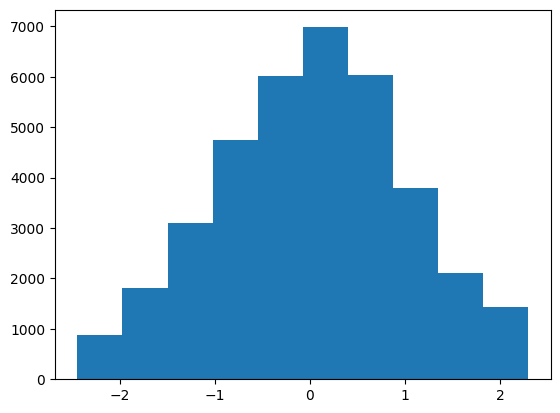

In [ ]:
import matplotlib.pyplot as plt
plt.hist(M_scaled[:,8 ])

In [ ]:
float_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
import csv
import requests
import numpy as np

resp = requests.get('https://raw.githubusercontent.com/gchoi/Dataset/master/weatherAUS.csv')
data = list(csv.reader(resp.text.split('\n')))
col_names = data[0]
data = data[1:-1]

float_cols = col_names[2:7]+ col_names[11:21]
float_data = [x[2:7]+ x[11:21] for x in data]
float_data = np.array([[float(entry) if entry != 'NA' else 0 for entry in row] for row in float_data])

M = float_data
#L = float_data[:,-1]
#avg_temp = np.mean(L)
#L = [0 if x<avg_temp else 1 for x in L]

L = [1 if x[-1]=='Yes' else 0 for x in data]


###### require zero mean and unit variance
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(M)
M_scaled = scaler.transform(M)


### Test code functions(not for error estimation)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(M_scaled, L)
clf.score(M_scaled, L)


0.8263333423714108

In [ ]:
len(M_scaled)

36881

In [ ]:
### quick test(simple error estimation)
clf = LogisticRegression()
clf.fit(M_scaled[:20000], L[:20000])
clf.score(M_scaled[20000:], L[20000:])

0.82151531307387

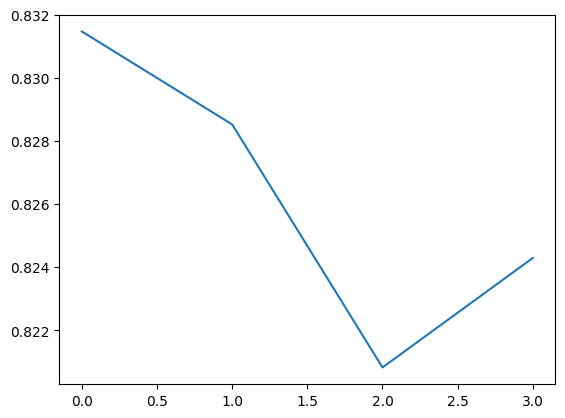

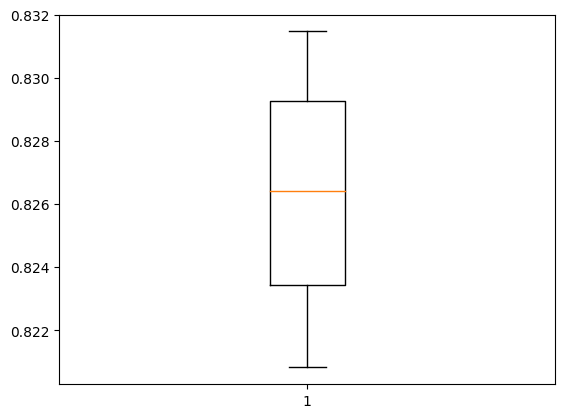

0.8262789731116914


In [ ]:
### Real reporting (rigerous error estimation)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, M_scaled, L, cv=4)

#Scores
import  matplotlib.pyplot as plt
plt.plot(scores)
plt.show()

# Box Plot
plt.boxplot(scores)
plt.show()
print(np.mean(scores))

In [ ]:
### Test code functions(simple error estimation)
from sklearn.model_selection import GridSearchCV
params = dict([['penalty',['l2']], ['C',[.001, .01, .1, .25, .5, 1]]])
lr = LogisticRegression()
clf = GridSearchCV(lr, params)
clf.fit(M_scaled[:20000], L[:20000])
clf.cv_results_['mean_test_score']

clf.cv_results_['params'][3]
lr = LogisticRegression( **clf.cv_results_['params'][3])
lr.fit(M_scaled[20000:], L[20000:])
lr.score(M_scaled[:20000], L[:20000])

0.82975

In [ ]:
from sklearn.model_selection import GridSearchCV
params = dict([['penalty',['l2']], ['C',[.001, .01, .1, .25, .5, 1]]])
lr = LogisticRegression()
clf = GridSearchCV(lr, params)
clf.fit(M_scaled[:20000], L[:20000])
clf.cv_results_['mean_test_score']

array([0.818  , 0.82705, 0.82785, 0.8282 , 0.82825, 0.82825])

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(M_scaled.shape[1],)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(M_scaled[:20000], np.array(L[:20000]), epochs=200, verbose=1)
pred = model.predict(M_scaled[20000:])

from collections import Counter
ret = Counter(zip(np.round(pred).T[0], L[20000:]))
1 - ((ret[(1.0, 0)]+ret[(0, 1.0)])/len(L[20000:]))

Epoch 1/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6458 - loss: 0.6541
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8166 - loss: 0.4212
Epoch 3/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8286 - loss: 0.4030
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8219 - loss: 0.4066
Epoch 5/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8278 - loss: 0.3990
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8291 - loss: 0.4001
Epoch 7/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8300 - loss: 0.3895
Epoch 8/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8292 - loss: 0.3950
Epoch 9/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8353 - loss: 0.3896
Epoch 10/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8326 - loss: 0.3921
Epoch 11/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8331 - loss: 0.3900
Epoch 12/200
625/625 ━━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
1 - ((ret[(1.0, 0)]+ret[(0, 1.0)])/len(L[20000:]))

0.8336591434156744

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(M[:20000], L[:20000])
#clf.score(M[:20000], L[:20000], L)
list(zip(float_cols,clf.feature_importances_))

[('MinTemp', 0.06479760014230625),
 ('MaxTemp', 0.06030130655955003),
 ('Rainfall', 0.07805583213247497),
 ('Evaporation', 0.03669865600681496),
 ('Sunshine', 0.06783884594904312),
 ('WindSpeed9am', 0.04459527247560379),
 ('WindSpeed3pm', 0.04856886295949455),
 ('Humidity9am', 0.07111114917848224),
 ('Humidity3pm', 0.18188403268450232),
 ('Pressure9am', 0.0701667939117708),
 ('Pressure3pm', 0.07399532497702699),
 ('Cloud9am', 0.03012160284743565),
 ('Cloud3pm', 0.04751973515359991),
 ('Temp9am', 0.05987545962796002),
 ('Temp3pm', 0.06446952539393426)]

In [ ]:
clf.score(M[20000:], L[20000:])


0.838694390142764

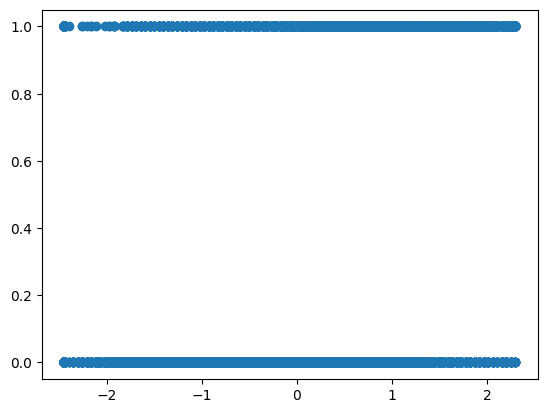

In [ ]:
np.corrcoef(M_scaled[:,8],L)
plt.scatter(M_scaled[:,8],L)
plt.show()


In [ ]:
#https://github.com/google-research/tuning_playbook/blob/main/README.md#choosing-the-optimizer


In [ ]:
sum(L)

8529

In [ ]:
8500/36000

0.2361111111111111

In [ ]:
Counter(zip(clf.predict(M[20000:]), L[20000:]))

Counter({(0, 0): 12270, (1, 1): 1898, (0, 1): 2029, (1, 0): 684})